In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline

## Building/Cleaning Data to Create CSV/DataFrames

In [2]:
df = pd.read_csv('data/Indonesia/Indonesia.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# missing value for 2020
# filling with 75th percentile

df['Ind_prod_60kg_bags'].fillna(df['Ind_prod_60kg_bags'].quantile(.75), inplace=True)

In [5]:
df['ind_prod_lbs'] = [(each*1000)*2.2 for each in df['Ind_prod_60kg_bags']]

In [6]:
df.drop('Ind_prod_60kg_bags', axis=1, inplace=True)

In [7]:
# df.to_csv('data/Indonesia/Indonesia2.csv')

In [8]:
avg_temp = pd.read_csv('data/Indonesia/tas_timeseries_annual_cru_1901-2021_IDN.csv')

In [9]:
avg_temp.drop(avg_temp.columns[[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis=1, inplace=True)

In [10]:
avg_temp.drop(avg_temp.columns[[2]], axis=1, inplace=True)

In [11]:
avg_temp2 = avg_temp.drop(avg_temp.index[0:89])

In [12]:
avg_temp3 = avg_temp2.drop(avg_temp2.index[31])

In [13]:
avg_temp3.rename(columns={'Variable:': 'Year'}, inplace=True)

In [14]:
avg_temp3.rename(columns={'Indonesia': 'ind_avg_temp_celsius'}, inplace=True)

In [15]:
ind = pd.merge(df, avg_temp3, on='Year')

In [16]:
ind = ind[['Year', 'Temp Change', 'ind_avg_temp_celsius', 'ind_prod_lbs']]

In [17]:
ind.rename(columns={'Year': 'year', 'Temp Change': 'temp_change'}, inplace=True)

In [18]:
# ind.to_csv('data/Indonesia/ind_final.csv')

In [19]:
df = pd.read_csv('data/Indonesia/ind_final.csv')

In [20]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [21]:
df2 = pd.read_csv('data/cleaned_merged_df.csv')

In [22]:
df.rename(columns={'temp_change': 'ind_annual_celcsius_change'}, inplace=True)

In [23]:
cleaned_merged_df2 = pd.merge(df, df2, on='year')

In [24]:
cleaned_merged_df2

,year,ind_annual_celcsius_change,ind_avg_temp_celsius,ind_prod_lbs,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,col_production_lbs,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change
0,1990,0.120,25.43,1.637104e+07,2908960,5036,1464856,2.970000,25.120,31671200.00,0.258,0.66,2909.451000,0.244,1074.101000,1200.0,40254757.40,24.77,0.440
1,1991,0.203,25.32,1.868503e+07,2763440,5502,1520382,2.810000,25.050,39556873.40,0.347,0.53,2924.664000,0.244,841.329000,1264.0,41054596.00,24.82,0.470
2,1992,0.264,25.28,1.225285e+07,2500320,5177,1294373,2.580000,24.910,32883131.60,0.532,0.25,1825.171000,0.244,734.461000,1331.0,40238996.60,24.95,0.381
3,1993,0.206,25.17,1.483523e+07,2259330,5660,1278759,2.470000,25.020,25129328.40,0.157,0.36,2967.004000,0.244,1166.778000,1402.0,42277701.40,24.80,0.522
4,1994,0.267,25.25,1.180933e+07,2097650,6232,1307289,3.400000,25.140,28520800.00,0.162,0.49,2762.730000,0.599,1475.325000,1476.0,38117428.80,24.77,0.612
5,1995,0.344,25.31,1.006154e+07,1869980,4974,930135,4.040000,25.270,28463639.60,0.431,0.78,3165.322000,0.815,1276.118000,1555.0,38198316.20,24.97,0.781
6,1996,0.387,25.26,1.808528e+07,1920250,7130,1369196,3.430000,25.050,23713470.00,0.057,0.35,3407.442000,0.775,1838.231000,1637.0,39729800.00,24.63,0.506
7,1997,0.397,25.52,1.676571e+07,1988190,6179,1228513,4.110000,25.280,26669491.20,0.431,0.65,3056.864000,0.713,1979.733000,1724.0,39149983.40,25.01,0.694
8,1998,0.997,25.89,1.605110e+07,2070410,8160,1689366,3.770000,25.680,23909516.40,0.848,0.99,2927.725000,0.806,1917.061000,1816.0,40928357.80,25.30,1.282
9,1999,0.265,25.13,1.442555e+07,2222925,7341,1631852,3.430000,25.150,20926940.98,-0.105,0.79,3784.051000,0.314,1818.087000,1912.0,42590741.60,24.46,0.602


In [25]:
# cleaned_merged_df2.to_csv('data/cleaned_merged_df2.csv')

In [26]:
df2 = pd.read_csv('data/cleaned_merged_df3.csv')

In [27]:
b_prod = pd.read_csv('data/production.csv')

In [28]:
b_prod.drop(b_prod.columns[[0]], axis=1, inplace=True)

In [29]:
b_prod.drop(b_prod.index[0:2], inplace=True)

In [30]:
b_prod.drop(b_prod.index[1:56], inplace=True)

In [31]:
df = b_prod.transpose()

In [32]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

In [33]:
df = df.reset_index()

In [34]:
df.rename(columns={'index': 'year', 'Brazil': 'b_prod_60kg_bags'}, inplace=True)

In [35]:
df.dtypes

Crop year
year                object
b_prod_60kg_bags    object
dtype: object

In [36]:
df['b_prod_lbs'] = [(each*1000)*2.2 for each in df['b_prod_60kg_bags']]

In [37]:
df.drop(df.columns[[1]], axis=1, inplace=True)

In [38]:
df['year'] = df['year'].str[:-3]

In [39]:
df['year'] = df['year'].astype(int)

In [40]:
cleaned_merged_df4 = pd.merge(df, df2, on='year')

In [41]:
cleaned_merged_df4.drop(cleaned_merged_df4.columns[[2, 3]], axis=1, inplace=True)

In [42]:
cleaned_merged_df4.head()

,year,b_prod_lbs,ind_annual_celcsius_change,ind_avg_temp_celsius,ind_prod_lbs,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,...,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change,e_avg_temp
0,1990,60028382.92,0.120,25.43,16371042.6,2908960,5036,1464856,2.97,25.12,...,0.258,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77,0.440,23.04
1,1991,60045685.48,0.203,25.32,18685031.2,2763440,5502,1520382,2.81,25.05,...,0.347,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82,0.470,23.13
2,1992,76127379.24,0.264,25.28,12252851.6,2500320,5177,1294373,2.58,24.91,...,0.532,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95,0.381,22.79
3,1993,61967352.92,0.206,25.17,14835233.6,2259330,5660,1278759,2.47,25.02,...,0.157,0.36,2967.004,0.244,1166.778,1402.0,42277701.4,24.80,0.522,22.82
4,1994,62022503.40,0.267,25.25,11809331.6,2097650,6232,1307289,3.40,25.14,...,0.162,0.49,2762.730,0.599,1475.325,1476.0,38117428.8,24.77,0.612,22.91


In [43]:
# cleaned_merged_df4.to_csv('data/cleaned_merged_df4.csv')

# Modeling

### Loading Data

In [44]:
df = pd.read_csv('data/cleaned_merged_df4.csv')

In [45]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [46]:
df.tail(3)

,year,b_prod_lbs,ind_annual_celcsius_change,ind_avg_temp_celsius,ind_prod_lbs,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,...,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change,e_avg_temp
27,2017,1.160276e+08,0.968,25.59,23875093.66,1802417,14894,2684508,4.450000,25.77,...,0.625,1.40,7346.7332,1.464,3773.406333,3643.0,57602600.0,25.11,1.348,23.65
28,2018,1.432878e+08,0.881,25.58,21158707.24,1863966,19060,3552729,4.300000,25.59,...,0.972,1.20,7511.2234,0.944,3589.048020,3685.0,58331521.6,25.04,1.170,23.27
29,2019,1.280636e+08,1.056,25.96,25152473.50,1825283,16500,3011745,4.141333,25.94,...,1.228,1.41,7343.4329,1.362,3921.249773,3781.0,59104449.8,25.42,1.532,23.41


### Train/Test Split for Temp (all 4 countries)

In [47]:
temp_features = [
    'ind_avg_temp_celsius', 
    'e_avg_temp', 
    'col_avg_temp_celsius',
    'b_annual_avg_temp'
]

In [48]:
df[temp_features].isnull().sum()

ind_avg_temp_celsius    0
e_avg_temp              0
col_avg_temp_celsius    0
b_annual_avg_temp       0
dtype: int64

In [49]:
X = df[temp_features]
y = df['usa_retail_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Scaling

In [50]:
ss = StandardScaler()
print(ss.fit(X_train))

StandardScaler()


In [51]:
ss = StandardScaler()
print(ss.fit(X_test))

StandardScaler()


### Linear Regression for Temp (all 4 counties)

In [52]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.3734732342375028 -0.40131170280052086
MLR intercept: -21.112368586285967
MLR coeffs: [-1.88830049 -0.02702171 -0.20196791  3.09609429]


### Lasso for Temp (all 4 countries)

In [53]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Lasso score:', lasso.score(X_train, y_train), lasso.score(X_test, y_test))
print('Lasso intercept:', lasso.intercept_)
print('Lasso coeffs:', lasso.coef_)

Lasso score: 0.0 -0.4836121805558744
Lasso intercept: 3.622821300940439
Lasso coeffs: [0. 0. 0. 0.]


### Ridge for Temp (all 4 countries)

In [54]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Ridge score:', ridge.score(X_train, y_train), ridge.score(X_test, y_test))
print('Ridge intercept:', ridge.intercept_)
print('Ridge coeffs:', ridge.coef_)

Ridge score: 0.2740455820885115 -0.00419153000408401
Ridge intercept: -26.580509811165854
Ridge coeffs: [-0.02938096  0.39727081  0.16709224  0.69004647]


### Train/Test Split for Production (all 4 countries)

In [55]:
prod_features = [
    'ind_prod_lbs', 
    'col_production_lbs', 
    'e_prod',
    'b_prod_lbs'
]

In [56]:
df[prod_features].isnull().sum()

ind_prod_lbs          0
col_production_lbs    0
e_prod                0
b_prod_lbs            0
dtype: int64

In [57]:
X = df[prod_features]
y = df['usa_retail_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Linear Regression for Production (all 4 countries)

In [58]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.44353998819682683 0.45966424192158284
MLR intercept: 2.843835978776019
MLR coeffs: [ 6.72053432e-08 -3.46340339e-08  1.08976633e-04 -3.16729409e-10]


#### Lasso for Production (all 4 countires)

In [59]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Lasso score:', lasso.score(X_train, y_train), lasso.score(X_test, y_test))
print('Lasso intercept:', lasso.intercept_)
print('Lasso coeffs:', lasso.coef_)

Lasso score: 0.4435372753882937 0.4601123754468267
Lasso intercept: 2.8448404561844898
Lasso coeffs: [ 6.74330637e-08 -3.47007468e-08  1.07135712e-04 -2.59935580e-10]


#### Ridge for Production (all 4 countries)

In [60]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Ridge score:', ridge.score(X_train, y_train), ridge.score(X_test, y_test))
print('Ridge intercept:', ridge.intercept_)
print('Ridge coeffs:', ridge.coef_)

Ridge score: 0.4435399881968267 0.4596642441740758
Ridge intercept: 2.843835983755618
Ridge coeffs: [ 6.72053444e-08 -3.46340342e-08  1.08976624e-04 -3.16729128e-10]


### Linear Regression for Individual Country Production

### Brazil

In [61]:
X = df[['b_prod_lbs']]
y = df['usa_retail_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Linear Regression for Brazil Production

In [62]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.28947823626615643 0.3441955439413189
MLR intercept: 2.194464598065048
MLR coeffs: [1.64304545e-08]


#### Lasso for Brazil Production

In [63]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Lasso score:', lasso.score(X_train, y_train), lasso.score(X_test, y_test))
print('Lasso intercept:', lasso.intercept_)
print('Lasso coeffs:', lasso.coef_)

Lasso score: 0.28947823626615465 0.3441955084919954
Lasso intercept: 2.1944647175102343
Lasso coeffs: [1.64304531e-08]


#### Ridge for Brazil Production

In [64]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Ridge score:', ridge.score(X_train, y_train), ridge.score(X_test, y_test))
print('Ridge intercept:', ridge.intercept_)
print('Ridge coeffs:', ridge.coef_)

Ridge score: 0.28947823626615654 0.3441955439413188
Ridge intercept: 2.194464598065049
Ridge coeffs: [1.64304545e-08]


### Ethiopia

In [65]:
X = df[['e_prod']]
y = df['usa_retail_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Linear Regression for Ethiopia Production

In [66]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.360119810998626 0.24580471817671146
MLR intercept: 2.2251372743615008
MLR coeffs: [0.00030887]


#### Lasso for Ethiopia Production

In [67]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Lasso score:', lasso.score(X_train, y_train), lasso.score(X_test, y_test))
print('Lasso intercept:', lasso.intercept_)
print('Lasso coeffs:', lasso.coef_)

Lasso score: 0.36011923594717454 0.24565917938746085
Lasso intercept: 2.226903470158761
Lasso coeffs: [0.00030848]


#### Ridge for Ethiopia Production

In [68]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Ridge score:', ridge.score(X_train, y_train), ridge.score(X_test, y_test))
print('Ridge intercept:', ridge.intercept_)
print('Ridge coeffs:', ridge.coef_)

Ridge score: 0.3601198109986258 0.2458047161471879
Ridge intercept: 2.2251372991582468
Ridge coeffs: [0.00030887]


### Colombia

In [69]:
X = df[['col_production_lbs']]
y = df['usa_retail_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Linear Regression for Colombia Production

In [70]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.10123686974918555 -0.7878982106086718
MLR intercept: 4.88667404892861
MLR coeffs: [-4.82415064e-08]


#### Lasso for Colombia Production

In [71]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Lasso score:', lasso.score(X_train, y_train), lasso.score(X_test, y_test))
print('Lasso intercept:', lasso.intercept_)
print('Lasso coeffs:', lasso.coef_)

Lasso score: 0.1012368697491357 -0.7878979670005095
Lasso intercept: 4.886673161615404
Lasso coeffs: [-4.82414725e-08]


#### Ridge for Colombia Production

In [72]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Ridge score:', ridge.score(X_train, y_train), ridge.score(X_test, y_test))
print('Ridge intercept:', ridge.intercept_)
print('Ridge coeffs:', ridge.coef_)

Ridge score: 0.10123686974918555 -0.7878982106086705
Ridge intercept: 4.886674048928608
Ridge coeffs: [-4.82415064e-08]


### Indonesia

In [73]:
X = df[['ind_prod_lbs']]
y = df['usa_retail_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Linear Regression for Indonesia Production

In [74]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.3538131649298706 0.5340857911865375
MLR intercept: 1.890872405104997
MLR coeffs: [9.53485117e-08]


#### Lasso for Indoesia Production

In [75]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Lasso score:', lasso.score(X_train, y_train), lasso.score(X_test, y_test))
print('Lasso intercept:', lasso.intercept_)
print('Lasso coeffs:', lasso.coef_)

Lasso score: 0.35381316492981474 0.534085553947214
Lasso intercept: 1.8908730927642938
Lasso coeffs: [9.53484739e-08]


#### Ridge for Indonesia Production

In [76]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Ridge score:', ridge.score(X_train, y_train), ridge.score(X_test, y_test))
print('Ridge intercept:', ridge.intercept_)
print('Ridge coeffs:', ridge.coef_)

Ridge score: 0.35381316492987025 0.5340857911865364
Ridge intercept: 1.8908724051049999
Ridge coeffs: [9.53485117e-08]


### Linear Regression for Temperature to predict production

In [77]:
df.columns

Index(['year', 'b_prod_lbs', 'ind_annual_celcsius_change',
       'ind_avg_temp_celsius', 'ind_prod_lbs', 'b_hectares_harvested',
       'b_hectograms_per_hectare_yield', 'b_tonnes_produced',
       'usa_retail_price', 'b_annual_avg_temp', 'col_production_lbs',
       'col_annual_celsius_change', 'global_change_in_celsius', 'e_prod',
       'e_temp_change', 'e_export', 'e_consumption', 'us_consumption_lbs',
       'col_avg_temp_celsius', 'b_annual_celsius_change', 'e_avg_temp'],
      dtype='object')

In [78]:
X = df[['b_annual_avg_temp']]
y = df['b_prod_lbs']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [79]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.584081465553937 -0.35047492653032397
MLR intercept: -1700137862.311876
MLR coeffs: [70439074.95666267]


In [80]:
X = df[['ind_avg_temp_celsius']]
y = df['ind_prod_lbs']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.300836053859592 -0.0017423553829429839
MLR intercept: -286233081.131289
MLR coeffs: [11939710.23150827]


In [82]:
X = df[['col_avg_temp_celsius']]
y = df['col_production_lbs']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [83]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.08525694004260786 0.25288542208855647
MLR intercept: -109115781.65241422
MLR coeffs: [5420354.91238891]


In [84]:
X = df[['e_avg_temp']]
y = df['e_prod']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('MLR score:', mlr.score(X_train, y_train), mlr.score(X_test, y_test))
print('MLR intercept:', mlr.intercept_)
print('MLR coeffs:', mlr.coef_)

MLR score: 0.7008018851469617 -0.17506875611057326
MLR intercept: -88611.31762214666
MLR coeffs: [3989.56698882]


## Gridsearch

In [86]:
X = df.drop(['usa_retail_price'], axis=1)
y = df['usa_retail_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [87]:
ss = StandardScaler()
print(ss.fit(X_train))

StandardScaler()


In [88]:
ss = StandardScaler()
print(ss.fit(X_test))

StandardScaler()


In [89]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('MLR score:', lasso.score(X_train, y_train), lasso.score(X_test, y_test))
print('MLR intercept:',lasso.intercept_)
print('MLR coeffs:', lasso.coef_)

MLR score: 0.7250897059769883 0.5427597031921797
MLR intercept: 4.140800605134725
MLR coeffs: [-0.00000000e+00 -9.75471108e-09 -0.00000000e+00 -0.00000000e+00
  5.59114977e-08  2.11088806e-06  8.88897210e-04 -4.08801369e-06
 -0.00000000e+00  2.01487827e-08 -0.00000000e+00  0.00000000e+00
 -3.19789367e-04 -0.00000000e+00  0.00000000e+00  2.46499012e-03
 -2.28662790e-07  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.129e+00, tolerance: 1.493e-03
  model = cd_fast.enet_coordinate_descent(


In [90]:
# Instantiate new pipeline object
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lasso', Lasso())
])

# Define dictionary of hyperparameters
pipe_params = {
    'ss__with_mean': [True, False],
    'lasso__max_iter': [5000, 7500],
    'lasso__alpha': [0.01, 0.1, 0.5, 1.0],
    'lasso__selection': ['cyclic', 'random']
}

# Instantiate our GridSearchCV object
gs = GridSearchCV(pipe, param_grid=pipe_params, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.01, 0.1, 0.5, 1.0],
                         'lasso__max_iter': [5000, 7500],
                         'lasso__selection': ['cyclic', 'random'],
                         'ss__with_mean': [True, False]},
             verbose=1)

In [91]:
gs

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.01, 0.1, 0.5, 1.0],
                         'lasso__max_iter': [5000, 7500],
                         'lasso__selection': ['cyclic', 'random'],
                         'ss__with_mean': [True, False]},
             verbose=1)

In [92]:
gs.best_params_

{'lasso__alpha': 0.5,
 'lasso__max_iter': 5000,
 'lasso__selection': 'random',
 'ss__with_mean': False}

In [93]:
gs.best_score_

-1.4840563189672848

In [94]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.07891135678272942, -0.34806317808024767)

In [95]:
gs.best_estimator_

Pipeline(steps=[('ss', StandardScaler(with_mean=False)),
                ('lasso', Lasso(alpha=0.5, max_iter=5000, selection='random'))])

In [96]:
cross_val_score(gs.best_estimator_, X_train, y_train).mean()

-1.4841971430031922

### Visuals

In [97]:
df = pd.read_csv('data/cleaned_merged_df4.csv')

In [98]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [99]:
df['e_prod_lbs'] = [(each*1000)*2.2 for each in df['e_prod']]

In [100]:
df.head(3)

,year,b_prod_lbs,ind_annual_celcsius_change,ind_avg_temp_celsius,ind_prod_lbs,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,...,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius,b_annual_celsius_change,e_avg_temp,e_prod_lbs
0,1990,60028382.92,0.120,25.43,16371042.6,2908960,5036,1464856,2.97,25.12,...,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77,0.440,23.04,6400792.2
1,1991,60045685.48,0.203,25.32,18685031.2,2763440,5502,1520382,2.81,25.05,...,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82,0.470,23.13,6434260.8
2,1992,76127379.24,0.264,25.28,12252851.6,2500320,5177,1294373,2.58,24.91,...,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95,0.381,22.79,4015376.2


In [101]:
df.columns

Index(['year', 'b_prod_lbs', 'ind_annual_celcsius_change',
       'ind_avg_temp_celsius', 'ind_prod_lbs', 'b_hectares_harvested',
       'b_hectograms_per_hectare_yield', 'b_tonnes_produced',
       'usa_retail_price', 'b_annual_avg_temp', 'col_production_lbs',
       'col_annual_celsius_change', 'global_change_in_celsius', 'e_prod',
       'e_temp_change', 'e_export', 'e_consumption', 'us_consumption_lbs',
       'col_avg_temp_celsius', 'b_annual_celsius_change', 'e_avg_temp',
       'e_prod_lbs'],
      dtype='object')

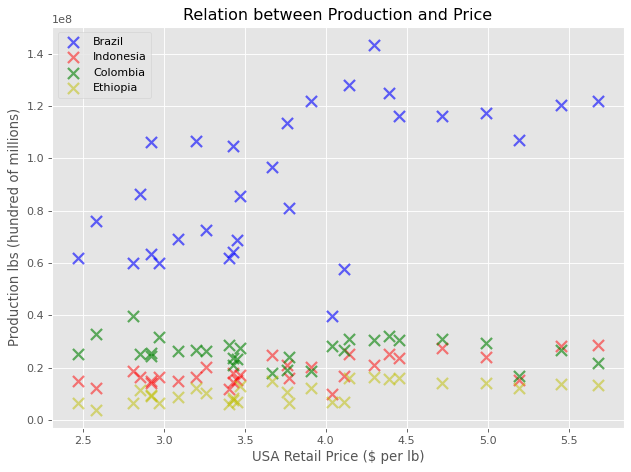

In [102]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
 
plt.style.use('ggplot')
 
plt.title('Relation between Production and Price')
plt.xlabel('USA Retail Price ($ per lb)')
plt.ylabel('Production lbs (hundred of millions)')
plt.scatter(x=df['usa_retail_price'],y=df['b_prod_lbs'],s=100,c='b',alpha=0.6,marker='x', linewidths=2, label = "Brazil")
plt.scatter(x=df['usa_retail_price'],y=df['ind_prod_lbs'],s=100,c='r',alpha=0.5,marker='x', linewidths=2, label = "Indonesia")
plt.scatter(x=df['usa_retail_price'],y=df['col_production_lbs'],s=100,c='g',alpha=0.6,marker='x', linewidths=2, label = "Colombia")
plt.scatter(x=df['usa_retail_price'],y=df['e_prod_lbs'],s=100,c='y',alpha=0.5,marker='x', linewidths=2, label = "Ethiopia")
 
plt.legend(loc='upper left')
 
 
plt.tight_layout()
 
plt.show()

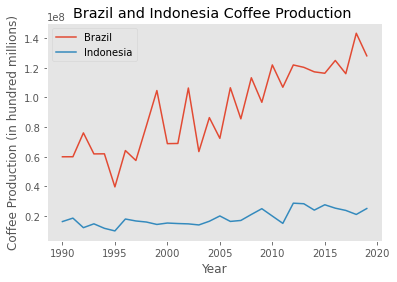

In [103]:
x1 = df.year
y1 = df.b_prod_lbs
plt.plot(x1, y1, label = "Brazil")

x2 = df.year
y2 = df.ind_prod_lbs
plt.plot(x2, y2, label = "Indonesia")

plt.xlabel('Year')
plt.ylabel('Coffee Production (in hundred millions)')

plt.title('Brazil and Indonesia Coffee Production ')

plt.legend()
plt.grid()

plt.show()

In [104]:
df = pd.read_csv('data/cleaned_merged_df4.csv')

In [105]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [106]:
df.drop(df.index[0:29], inplace=True)

In [107]:
df.drop(df.columns[[2,3,5,6,7,8,9,11,12,14,15,16,17,18,19,20]], axis=1, inplace=True)

In [108]:
df.columns

Index(['year', 'b_prod_lbs', 'ind_prod_lbs', 'col_production_lbs', 'e_prod'], dtype='object')

In [109]:
df

,year,b_prod_lbs,ind_prod_lbs,col_production_lbs,e_prod
29,2019,1.280636e+08,25152473.5,31020260.04,7343.4329


In [110]:
df['e_prod_lbs'] = [(each*1000)*2.2 for each in df['e_prod']]

In [111]:
df

,year,b_prod_lbs,ind_prod_lbs,col_production_lbs,e_prod,e_prod_lbs
29,2019,1.280636e+08,25152473.5,31020260.04,7343.4329,16155552.38


In [112]:
df.drop(df.columns[[4]], axis=1, inplace=True)

In [113]:
df = pd.read_csv('data/2019_prod.csv')

In [114]:
df

,Unnamed: 0,year,b_prod_lbs,ind_prod_lbs,col_production_lbs,e_prod_lbs
0,29,2019,1.280636e+08,25152473.5,31020260.04,16155552.38


In [115]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)

In [116]:
df

,b_prod_lbs,ind_prod_lbs,col_production_lbs,e_prod_lbs
0,1.280636e+08,25152473.5,31020260.04,16155552.38


In [117]:
df.rename(columns={'b_prod_lbs': 'Brazil', 'ind_prod_lbs': 'Indonesia', 'col_production_lbs': 'Colombia', 'e_prod_lbs': 'Ethiopia'}, inplace=True)

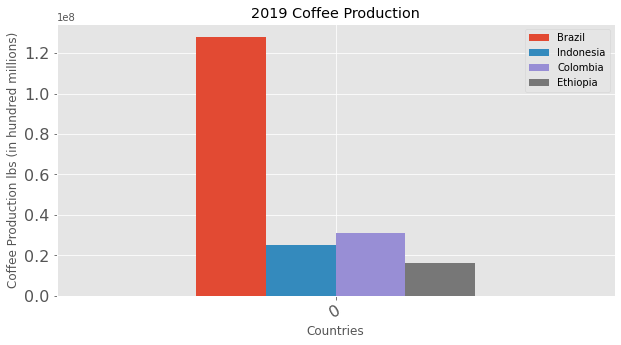

In [118]:
df.plot(kind='bar',
       figsize=(10, 5),
       title='2019 Coffee Production',
       xlabel='Countries',
       ylabel='Coffee Production lbs (in hundred millions)',
       rot=30,
       fontsize=16,
       grid=True);